# Draw histogram

In [87]:
using Pkg
Pkg.add("RDatasets")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [88]:
using Plots, RDatasets

In [89]:
iris = dataset("datasets", "iris")
first(iris,5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [100]:
x = "SepalLength"
iris.SepalLength 
iris."SepalLength"
iris[1:6, x]

6-element Array{Float64,1}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4

In [109]:
cols = ["SepalLength", "SepalWidth"]
iris[1:6, cols] |> println
iris[1:6, cols] |> typeof |> println
iris[1:6, cols] |> Matrix 

6×2 DataFrame
 Row │ SepalLength  SepalWidth 
     │ Float64      Float64    
─────┼─────────────────────────
   1 │         5.1         3.5
   2 │         4.9         3.0
   3 │         4.7         3.2
   4 │         4.6         3.1
   5 │         5.0         3.6
   6 │         5.4         3.9
DataFrame


6×2 Array{Float64,2}:
 5.1  3.5
 4.9  3.0
 4.7  3.2
 4.6  3.1
 5.0  3.6
 5.4  3.9

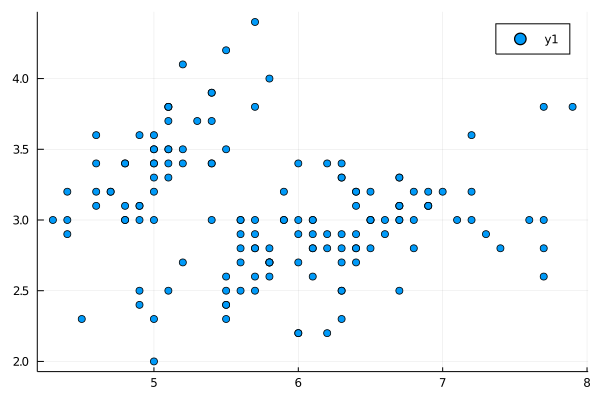

In [112]:
plot(iris.SepalLength, iris.SepalWidth, seriestype=:scatter)

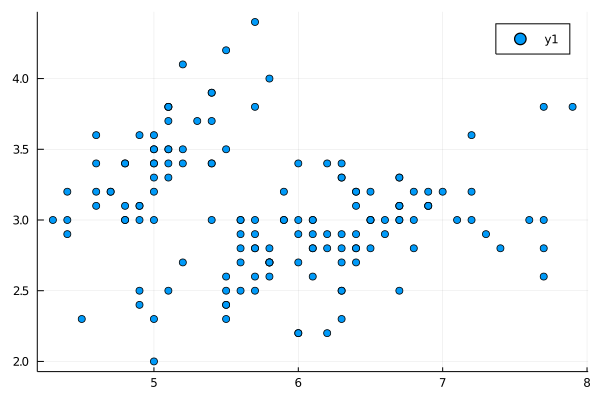

In [18]:
scatter(iris.SepalLength, iris.SepalWidth)

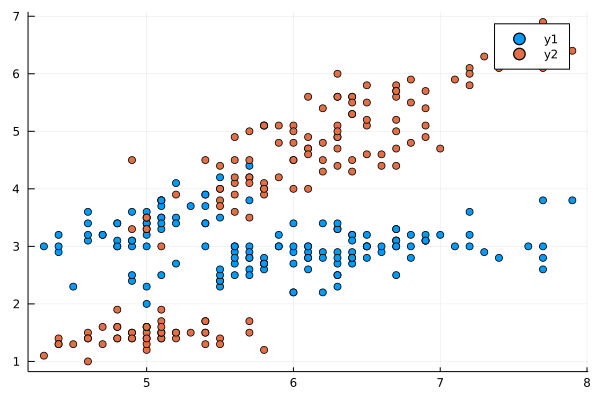

In [118]:
cols = ["SepalWidth", "PetalLength"]
y = iris[:,cols] |> Matrix
scatter(iris.SepalLength, y)

In [122]:
cols = ["a",
        "b"]

1×2 Array{String,2}:
 "a"  "b"

In [123]:
cols = ["a" "b"]

1×2 Array{String,2}:
 "a"  "b"

In [120]:
reshape(cols, 1, :)

1×2 Array{String,2}:
 "SepalWidth"  "PetalLength"

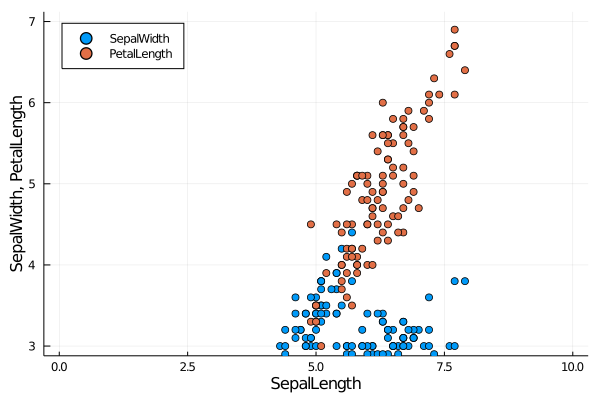

In [135]:
cols = ["SepalWidth", "PetalLength"]
y = iris[:,cols] |> Matrix
scatter(iris.SepalLength, y, 
    xlabel="SepalLength", 
    ylabel="SepalWidth, PetalLength",
    label = reshape(cols, 1,:),
    xlim = [0,10],
    ylim = [3, 7],
    legend=:topleft
)

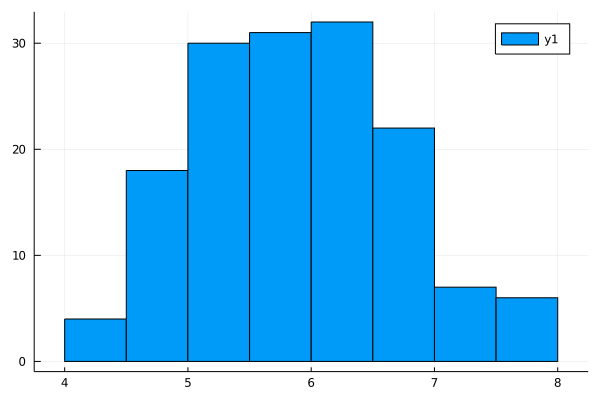

In [138]:
x = "SepalLength"
histogram(iris[:,x])

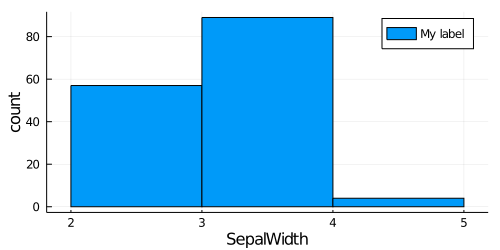

In [159]:
x = "SepalWidth"
low = iris[:,x] |> minimum |> floor
high = iris[:, x] |> maximum |> ceil

histogram(iris[:, x],
    xlabel=x,
    ylabel="count",
    label= "My label",
    size=(500,250),
    bins = low:1:high,
)

In [186]:
first(iris, 5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


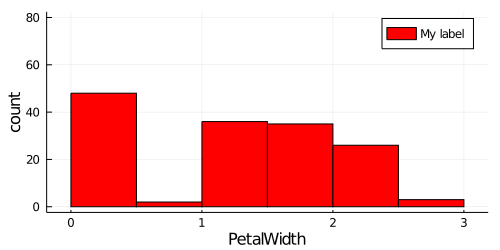

In [187]:
function myhist(x, iris)
    z = iris[:,x]
    low = z |> minimum |> floor
    high = z |> maximum |> ceil

    p = histogram(z,
        xlabel=x,
        ylabel="count",
        label= "My label",
        size=(500,250),
        bins = low:0.5:high,
        ylim=[0,80],
        color="red"
    )
    Plots.display(p)
end

x = "PetalWidth"
myhist(x, iris)

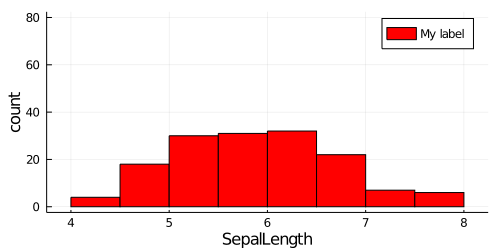

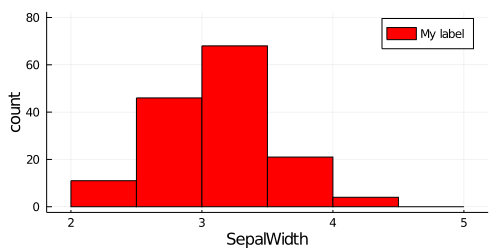

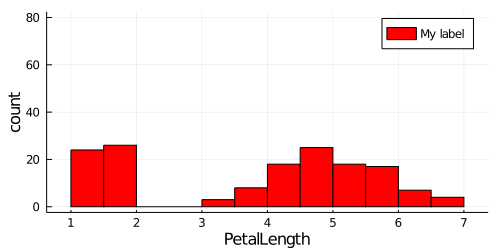

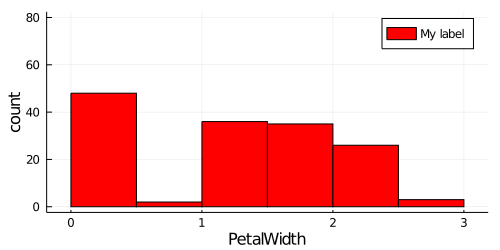

In [185]:
cols = names(iris)[1:end-1]
for col in cols
    myhist(col,iris)
end

In [174]:
download("https://bit.ly/32Fb6AV", "personal_info.csv")

In [188]:
Pkg.add(["CSV", "DataFrames"])

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [174]:
using CSV, DataFrames
df = DataFrame(CSV.File("personal_info.csv"), )

,id,gender,age,prefecture
,Int64,String,Int64,String
1,1,male,15,長崎県
2,2,male,57,大阪府
3,3,female,44,北海道
4,4,male,19,三重県
5,5,male,28,佐賀県
6,6,female,30,熊本県
7,7,female,44,愛媛県
8,8,female,28,香川県
9,9,male,28,香川県


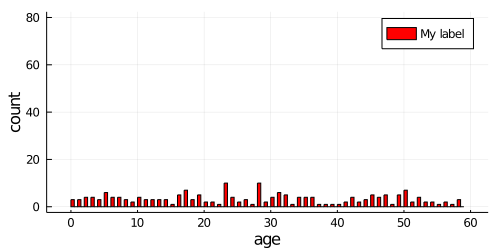

In [189]:
myhist("age", df)